# Obesity risk factors classification

In [1]:
# import the nescessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn import svm
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#importing the dataset
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
#checking for the data size and types
print(data.dtypes)
print(data.shape)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object
(2111, 17)


### Data cleaning and processing

In [4]:
# checking for the null value in dataset
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

since there is no null value we can continue to data processing

In [5]:
# radomizing the order in dataset
data = data.sample(frac=1).reset_index(drop=True)

In [6]:
# seperating data into classes and variables
variables = data.iloc[:,: -1]
classes = data.iloc[:, -1]
variables.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,22.000000,1.650000,65.00000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,yes,1.00000,0.000000,no,Automobile
1,Male,28.421533,1.829239,107.10819,yes,yes,2.465575,2.935381,Sometimes,no,2.480555,no,1.00183,1.670313,Sometimes,Automobile
2,Female,17.000000,1.600000,65.00000,no,yes,3.000000,1.000000,Sometimes,no,2.000000,yes,1.00000,2.000000,Sometimes,Public_Transportation
3,Female,16.000000,1.660000,58.00000,no,no,2.000000,1.000000,Sometimes,no,1.000000,no,0.00000,1.000000,no,Walking
4,Female,22.000000,1.580000,58.00000,yes,yes,2.000000,1.000000,Sometimes,no,1.000000,no,0.00000,0.000000,no,Public_Transportation


In [7]:
# since height and weight is a function of body type, we will drop these two variables to focus on the other risk factors
variables = variables.drop('Height', axis=1)
variables = variables.drop('Weight', axis=1)
variables.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,22.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,yes,1.00000,0.000000,no,Automobile
1,Male,28.421533,yes,yes,2.465575,2.935381,Sometimes,no,2.480555,no,1.00183,1.670313,Sometimes,Automobile
2,Female,17.000000,no,yes,3.000000,1.000000,Sometimes,no,2.000000,yes,1.00000,2.000000,Sometimes,Public_Transportation
3,Female,16.000000,no,no,2.000000,1.000000,Sometimes,no,1.000000,no,0.00000,1.000000,no,Walking
4,Female,22.000000,yes,yes,2.000000,1.000000,Sometimes,no,1.000000,no,0.00000,0.000000,no,Public_Transportation


In [8]:
# encoding variable into binomial and numerical value
var_encoding = {'Gender':                         {'Male': 0, 'Female': 1},
                'family_history_with_overweight': {'yes': 1, 'no': 0},
                'FAVC':                           {'yes': 1, 'no': 0},
                'CAEC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3},
                'SMOKE':                          {'yes': 1, 'no': 0},
                'SCC':                            {'yes': 1, 'no': 0},
                'CALC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3}}
variables = variables.replace(var_encoding)
variables.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,22.000000,1,1,2.000000,3.000000,2,0,2.000000,1,1.00000,0.000000,0,Automobile
1,0,28.421533,1,1,2.465575,2.935381,1,0,2.480555,0,1.00183,1.670313,1,Automobile
2,1,17.000000,0,1,3.000000,1.000000,1,0,2.000000,1,1.00000,2.000000,1,Public_Transportation
3,1,16.000000,0,0,2.000000,1.000000,1,0,1.000000,0,0.00000,1.000000,0,Walking
4,1,22.000000,1,1,2.000000,1.000000,1,0,1.000000,0,0.00000,0.000000,0,Public_Transportation


In [9]:
# for MTRANS, we will use one-hot encoding method since their is no linear relationship between each variables
mtrans = pd.get_dummies(variables['MTRANS'])
mtrans.head()

,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0


In [10]:
# combining the encoded MTRANS with the rest of the variables
variables = variables.drop('MTRANS', axis=1)
variables = pd.concat([variables, mtrans], axis=1)
variables.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,22.000000,1,1,2.000000,3.000000,2,0,2.000000,1,1.00000,0.000000,0,1,0,0,0,0
1,0,28.421533,1,1,2.465575,2.935381,1,0,2.480555,0,1.00183,1.670313,1,1,0,0,0,0
2,1,17.000000,0,1,3.000000,1.000000,1,0,2.000000,1,1.00000,2.000000,1,0,0,0,1,0
3,1,16.000000,0,0,2.000000,1.000000,1,0,1.000000,0,0.00000,1.000000,0,0,0,0,0,1
4,1,22.000000,1,1,2.000000,1.000000,1,0,1.000000,0,0.00000,0.000000,0,0,0,0,1,0


In [11]:
# due to the limited data size, we will simplify the classes to make the task more managable for the algorityms
cla_encoding = {'Overweight_Level_I': 'Overweight',
               'Overweight_Level_II': 'Overweight',
               'Obesity_Type_I':      'Obesity',
               'Obesity_Type_II':     'Obesity',
               'Obesity_Type_III':    'Obesity'}
classes = classes.replace(cla_encoding)
classes.head()

0    Normal_Weight
1          Obesity
2       Overweight
3    Normal_Weight
4    Normal_Weight
Name: NObeyesdad, dtype: object

## Classification

In [12]:
# creating a train test split
X_train, X_test, y_train, y_test = train_test_split(variables, classes, test_size=0.2, random_state=0)

### Naive Bayes classifier

In [13]:
#creating a classifier
nb_classifier = naive_bayes.MultinomialNB()

In [14]:
#training the model
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [15]:
# timing the processing time
%timeit nb_classifier.fit(X_train, y_train)

7.66 ms ± 382 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
# testing for in-sample and off-sample accuracy
nb_y_train = nb_classifier.predict(X_train)
nb_y_test = nb_classifier.predict(X_test)
nb_train_acc = accuracy_score(y_train, nb_y_train)
nb_test_acc = accuracy_score(y_test, nb_y_test)
print('The training accuracy is:', nb_train_acc)
print('The testing accuracy is:', nb_test_acc)

The training accuracy is: 0.504739336492891
The testing accuracy is: 0.541371158392435


In [17]:
# 5-folds crossvalidation
nb_5_folds = cross_val_score(nb_classifier, variables, classes, cv=5)
nb_5_folds_mean = nb_5_folds.mean()
nb_5_folds_var = nb_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', nb_5_folds)
print('the 5-folds crossvalidation mean score is:', nb_5_folds_mean)
print('the 5-folds crossvalidation varience is:', nb_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.50118203 0.50473934 0.51421801 0.51184834 0.50236967]
the 5-folds crossvalidation mean score is: 0.5068714777094327
the 5-folds crossvalidation varience is: 2.7184558833614674e-05


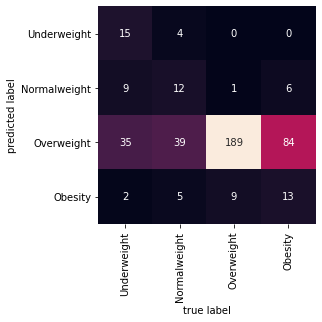

In [18]:
# creating a confusion matrix
nb_matrix = confusion_matrix(y_test,nb_y_test)
labels = ['Underweight', 'Normalweight', 'Overweight', 'Obesity']
sns.heatmap(nb_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Support Vector Machine Classifier

In [19]:
#creating a classifier
svm_classifier = svm.SVC()

In [20]:
#training the model
svm_classifier.fit(X_train, y_train)

SVC()

In [21]:
# timing the processing time
%timeit svm_classifier.fit(X_train, y_train)

370 ms ± 48.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
# testing for in-sample and off-sample accuracy
svm_y_train = svm_classifier.predict(X_train)
svm_y_test = svm_classifier.predict(X_test)
svm_train_acc = accuracy_score(y_train, svm_y_train)
svm_test_acc = accuracy_score(y_test, svm_y_test)
print('The training accuracy is:', svm_train_acc)
print('The testing sample accuracy is:', svm_test_acc)

The training accuracy is: 0.5029620853080569
The testing sample accuracy is: 0.5177304964539007


In [23]:
# 5-folds crossvalidation
svm_5_folds = cross_val_score(svm_classifier, variables, classes, cv=5)
svm_5_folds_mean = svm_5_folds.mean()
svm_5_folds_var = svm_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', svm_5_folds)
print('the 5-folds crossvalidation mean score is:', svm_5_folds_mean)
print('the 5-folds crossvalidation varience is:', svm_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.51536643 0.50473934 0.507109   0.52369668 0.51421801]
the 5-folds crossvalidation mean score is: 0.5130258926870805
the 5-folds crossvalidation varience is: 4.488831791876075e-05


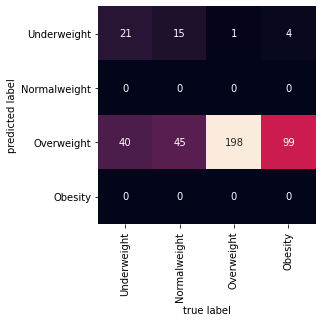

In [24]:
# creating a confusion matrix
svm_matrix = confusion_matrix(y_test,svm_y_test)
labels = ['Underweight', 'Normalweight', 'Overweight', 'Obesity']
sns.heatmap(svm_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Random Forest Classifier

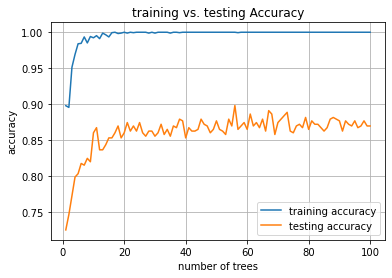

In [25]:
# mapping out the effect of number of trees to accuracy
training_accuracy = []
testing_accuracy = []
for n in range(1 , 101):
    classifier = ensemble.RandomForestClassifier(n_estimators=n)
    classifier.fit(X_train, y_train)
    training_accuracy.append(accuracy_score(y_train,
                                            classifier.predict(X_train)))
    testing_accuracy.append(accuracy_score(y_test,
                                           classifier.predict(X_test)))
plt.figure()
plt.plot(np.arange(1, 101), training_accuracy, label='training accuracy')
plt.plot(np.arange(1, 101), testing_accuracy, 
         label='testing accuracy')
plt.title('training vs. testing Accuracy')
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [26]:
#creating a classifier
rf_classifier  = ensemble.RandomForestClassifier(n_estimators=40)

In [27]:
#training the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [28]:
# timing the processing time
%timeit rf_classifier.fit(X_train, y_train)

123 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
# testing for in-sample and off-sample accuracy
rf_y_train = rf_classifier.predict(X_train)
rf_y_test = rf_classifier.predict(X_test)
rf_train_acc = accuracy_score(y_train, rf_y_train)
rf_test_acc = accuracy_score(y_test, rf_y_test)
print('The training is:', rf_train_acc)
print('The testing accuracy is:', rf_test_acc)

The training is: 0.9994075829383886
The testing accuracy is: 0.8747044917257684


In [30]:
# 5-folds crossvalidation
rf_5_folds = cross_val_score(rf_classifier, variables, classes, cv=5)
rf_5_folds_mean = rf_5_folds.mean()
rf_5_folds_var = rf_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', rf_5_folds)
print('the 5-folds crossvalidation mean score is:', rf_5_folds_mean)
print('the 5-folds crossvalidation varience is:', rf_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.86761229 0.86966825 0.87677725 0.86018957 0.86255924]
the 5-folds crossvalidation mean score is: 0.8673613211880834
the 5-folds crossvalidation varience is: 3.3707712319962395e-05


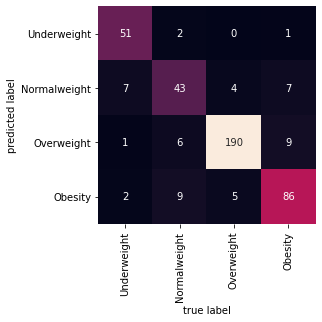

In [31]:
# creating a confusion matrix
rf_matrix = confusion_matrix(y_test,rf_y_test)
labels = ['Underweight', 'Normalweight', 'Overweight', 'Obesity']
sns.heatmap(rf_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');